In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)

if not dir1 in sys.path:
    sys.path.append(dir1)

os.chdir('..')

In [2]:
import pandas as pd
import warnings
import datetime
import calendar

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
warnings.simplefilter("ignore")

/tmp/ipykernel_36292/2196204693.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
X_emb = pd.read_csv('results/TS2Vec/x_emb.csv')
y_emb = pd.read_csv('results/TS2Vec/y.csv')

In [4]:
X_emb

,Datetime,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,Stock
0,2023-10-02 17:00:00,-0.385265,-0.123203,-0.091646,-0.204892,-0.034029,-0.085184,-0.201969,-0.228396,0.070437,...,-0.241715,0.060760,-0.279620,-0.041730,0.081007,-0.392990,-0.078081,-0.105887,-0.132299,AAPL
1,2023-10-02 18:00:00,-0.351957,-0.255687,-0.294856,-0.080170,-0.416529,0.022934,-0.527076,-0.070292,-0.141278,...,-0.019346,-0.037140,-0.114509,0.011569,-0.064772,0.018382,-0.261668,-0.132436,-0.192172,AAPL
2,2023-10-02 19:00:00,-0.128883,-0.273875,-0.303679,-0.131447,-0.006280,-0.187134,-0.054544,-0.113141,0.089145,...,-0.282725,0.068355,-0.410741,0.043855,0.088872,-0.251950,0.048974,-0.243150,-0.177219,AAPL
3,2023-10-02 20:00:00,-0.415582,-0.120054,-0.236820,-0.267131,-0.413341,-0.032708,-0.496844,-0.358852,-0.127075,...,0.030586,0.085363,-0.289977,-0.097256,-0.028461,-0.137592,-0.229315,-0.074737,-0.112864,AAPL
4,2023-10-02 21:00:00,-0.201604,-0.244662,-0.177347,-0.065351,-0.053743,-0.065106,-0.161435,-0.007014,0.081622,...,-0.253341,-0.007203,-0.173872,0.082190,0.129482,-0.247891,-0.111787,-0.310488,-0.250245,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,2023-11-06 18:00:00,-0.423353,-0.074542,-0.189596,-0.150413,-0.355937,-0.029139,-0.519545,-0.300839,-0.121003,...,0.035223,0.014384,-0.138413,-0.028406,0.066079,-0.144026,-0.300620,0.007082,-0.167317,XOM
4364,2023-11-06 19:00:00,-0.149557,-0.261403,-0.223415,-0.126792,-0.075474,-0.195349,-0.013328,-0.091172,0.055661,...,-0.179825,0.083767,-0.346477,0.092250,0.190184,-0.137902,-0.056755,-0.250590,-0.162810,XOM
4365,2023-11-06 20:00:00,-0.300638,-0.122891,-0.294276,-0.225548,-0.312759,-0.104975,-0.277257,-0.284171,-0.131726,...,0.034140,0.058917,-0.282131,0.013066,0.127952,-0.130242,-0.140989,-0.067567,-0.113063,XOM
4366,2023-11-06 21:00:00,-0.111392,-0.244962,-0.238885,-0.083403,-0.137289,-0.109434,-0.153449,0.051161,0.051914,...,-0.149552,0.034532,-0.229332,0.096231,0.164789,-0.114927,-0.174620,-0.308807,-0.202775,XOM


In [5]:
X_train = X_emb.loc[0:3695, :]
X_test = X_emb.loc[3696:, :]
y_train = y_emb.loc[0:3695, :]
y_test = y_emb.loc[3696:, :]

In [6]:
X_train['Close'] = y_train['Close']

In [7]:
X_train['Stock'].value_counts()

Stock
AAPL     132
ABBV     132
WMT      132
WFC      132
VZ       132
V        132
TSLA     132
PG       132
PFE      132
PEP      132
NVDA     132
NFLX     132
MSFT     132
MRK      132
KO       132
JPM      132
JNJ      132
INTC     132
GOOG     132
DIS      132
CVX      132
CSCO     132
CRM      132
CMCSA    132
BAC      132
AMD      132
ABT      132
XOM      132
Name: count, dtype: int64

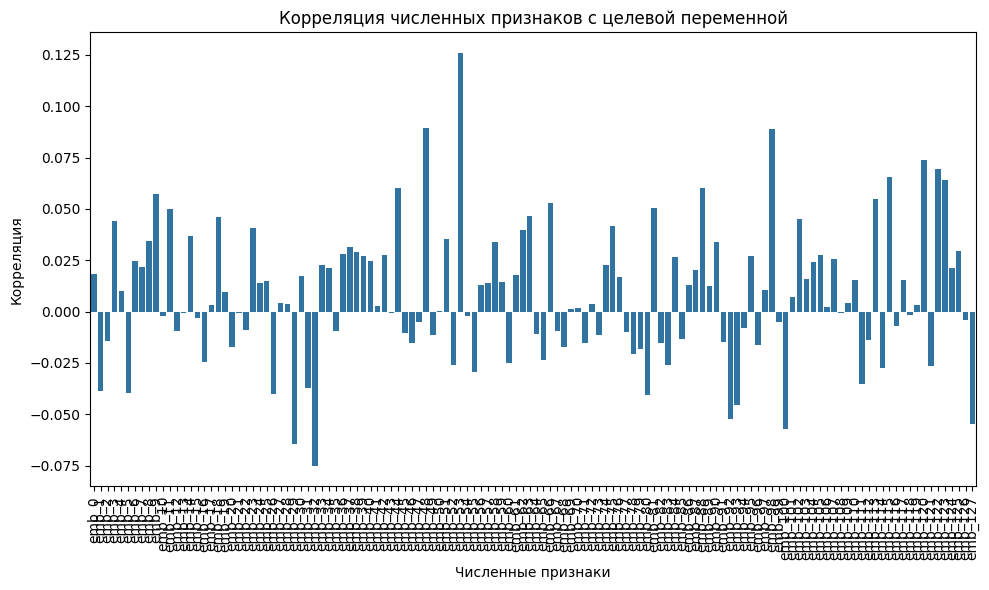

In [8]:
import seaborn as sns
correlation_matrix = X_train.drop(columns=['Stock', 'Datetime']).corr()


target_correlation = correlation_matrix['Close']


target_correlation = target_correlation.drop('Close')


plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.title('Корреляция численных признаков с целевой переменной')
plt.xlabel('Численные признаки')
plt.ylabel('Корреляция')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
correlation_with_target = correlation_matrix['Close'].abs()

top_30_correlated_features = correlation_with_target.sort_values(ascending=False).head(30)

print(top_30_correlated_features)


Close      1.000000
emb_53     0.125936
emb_48     0.089573
emb_98     0.088674
emb_32     0.074990
emb_120    0.074027
emb_122    0.069532
emb_115    0.065343
emb_29     0.064244
emb_123    0.064041
emb_44     0.060338
emb_88     0.059972
emb_9      0.057172
emb_100    0.057086
emb_113    0.054838
emb_127    0.054722
emb_66     0.052999
emb_92     0.052225
emb_81     0.050529
emb_11     0.049751
emb_63     0.046499
emb_18     0.045859
emb_93     0.045671
emb_102    0.045032
emb_3      0.043959
emb_75     0.041645
emb_23     0.040784
emb_80     0.040715
emb_26     0.040192
emb_5      0.039741
Name: Close, dtype: float64


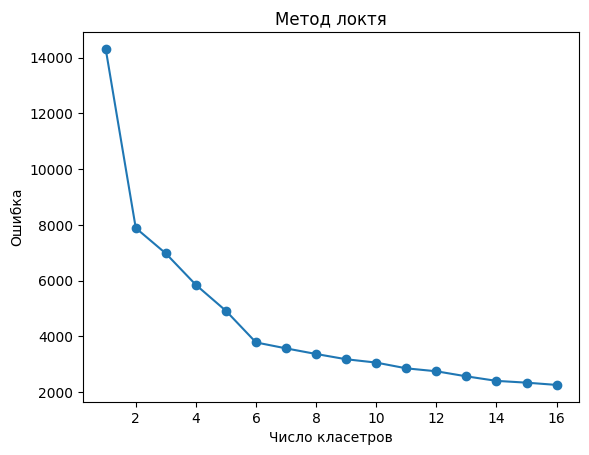

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(data, max_clusters):
    distortions = []
    
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Число класетров')
    plt.ylabel('Ошибка')
    plt.title('Метод локтя')
    plt.show()

elbow_method(X_train.drop(columns=['Datetime', 'Stock', 'Close']), 16)


## Оптимальное число кластеров - 12

<Figure size 1200x500 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

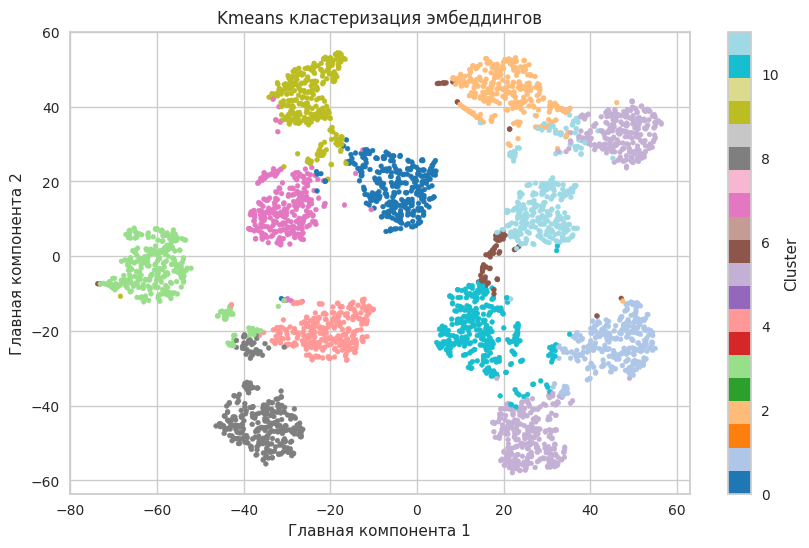

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer



scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train.drop(columns=['Close', 'Stock', 'Datetime']))

pca = TSNE(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=12)


plt.figure(figsize=[12, 5])
kmeans.fit(scaled_data)


cluster_labels = kmeans.labels_


plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='tab20', s=12)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Kmeans кластеризация эмбеддингов')
plt.colorbar(label='Cluster')
plt.show()


In [12]:
X_train['cluster'] = cluster_labels

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

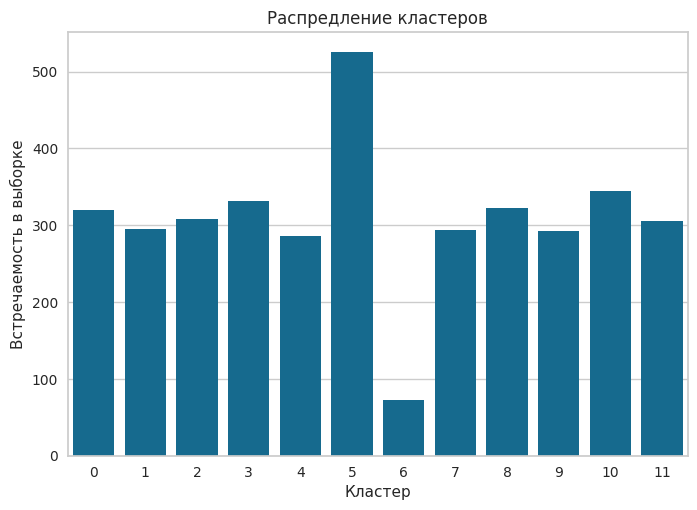

In [13]:

cluster_counts = X_train['cluster'].value_counts()

sns.countplot(x='cluster', data=X_train)
plt.title('Распредление кластеров')
plt.xlabel('Кластер')
plt.ylabel('Встречаемость в выборке')
plt.show()


In [14]:
def top_mode(data, n_top):
    mode_counts = data.value_counts()
    top_n_mode = mode_counts.head(n_top)
    return top_n_mode

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

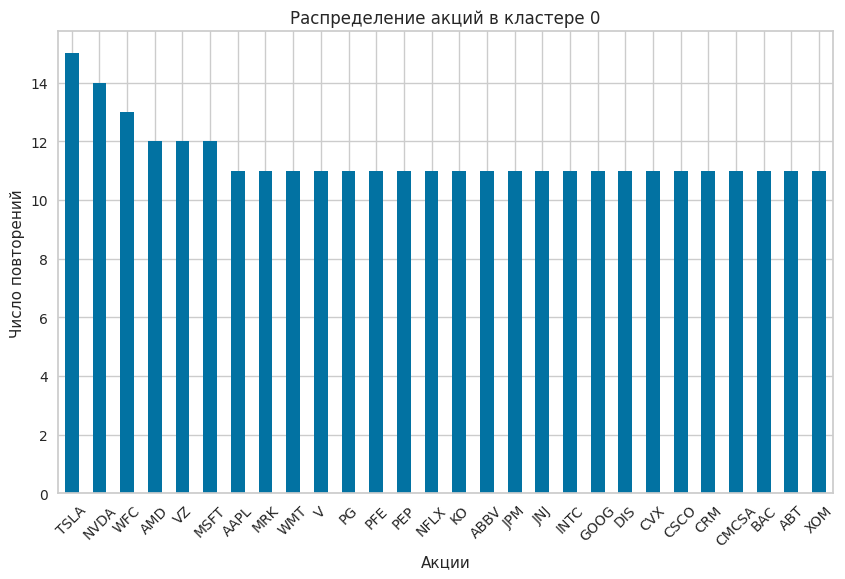

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

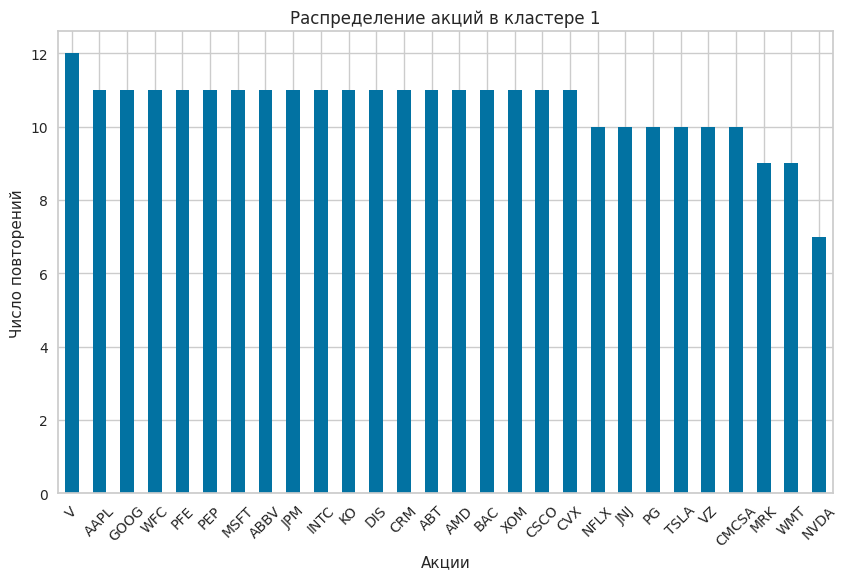

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

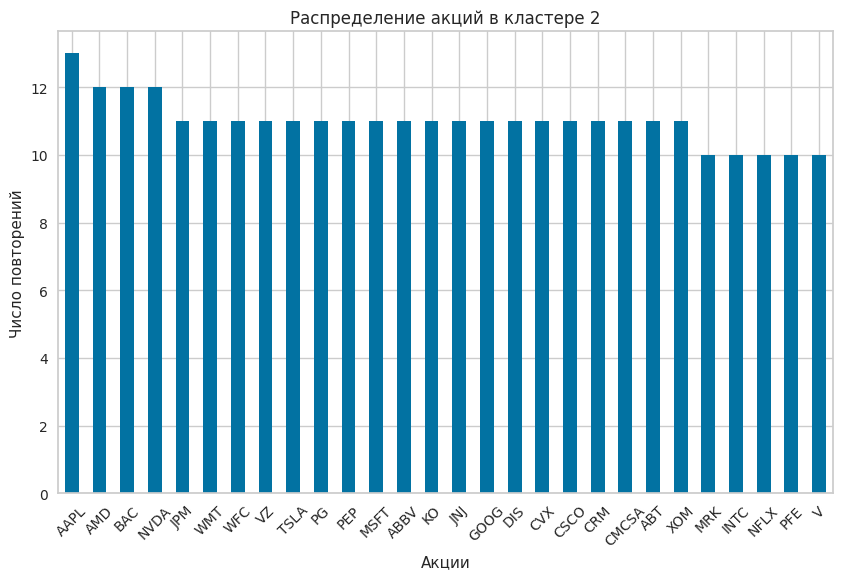

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

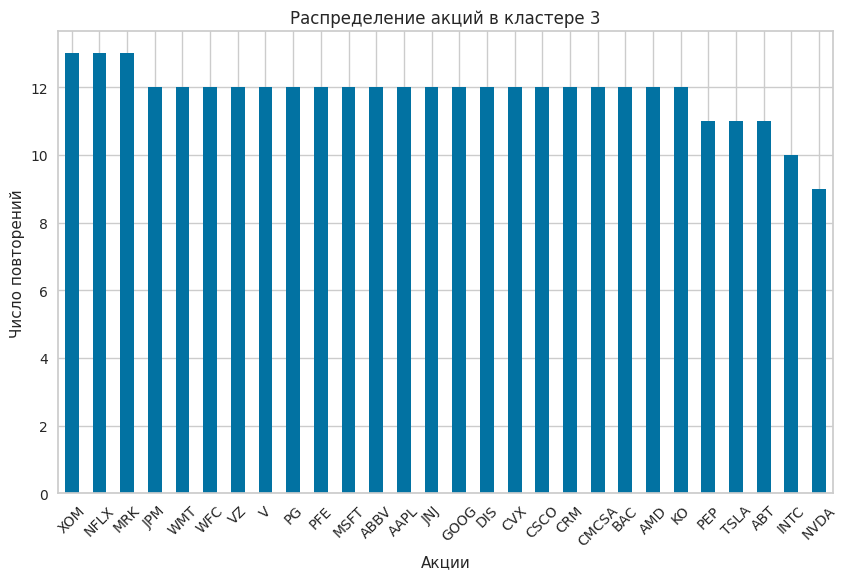

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

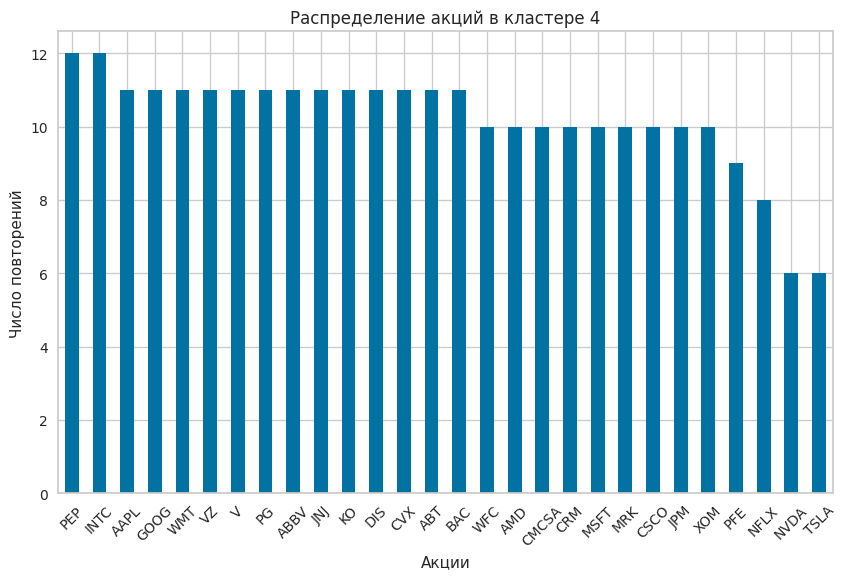

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

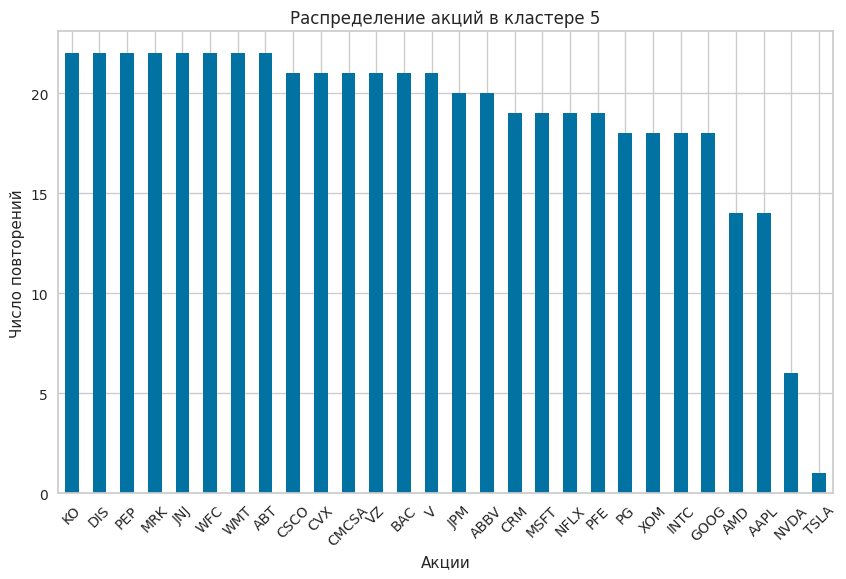

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

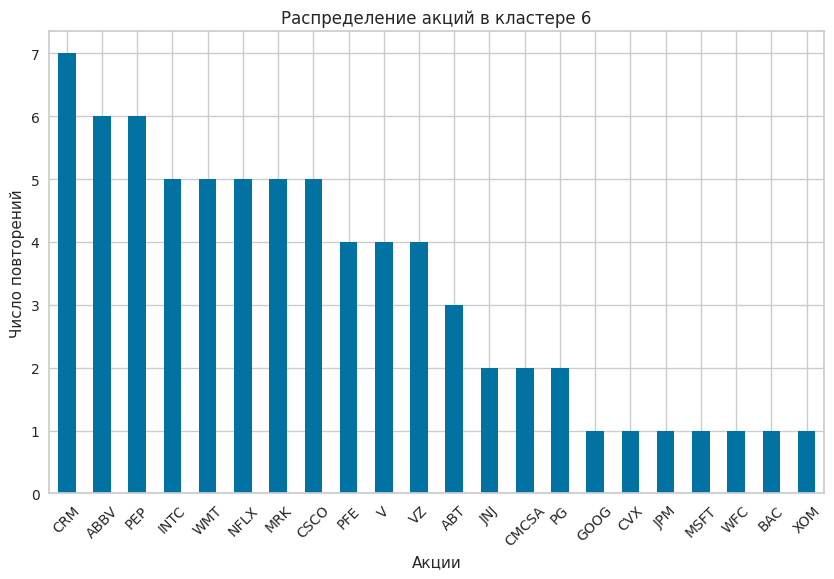

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

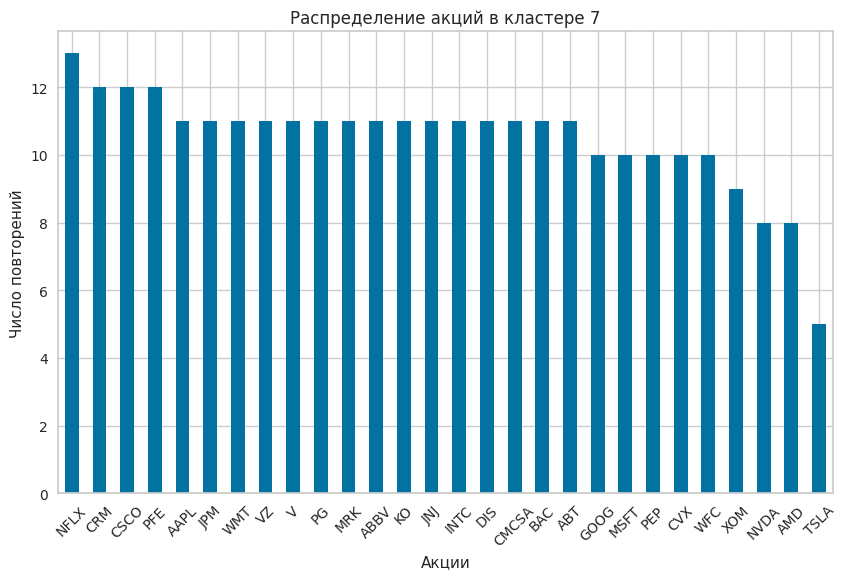

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

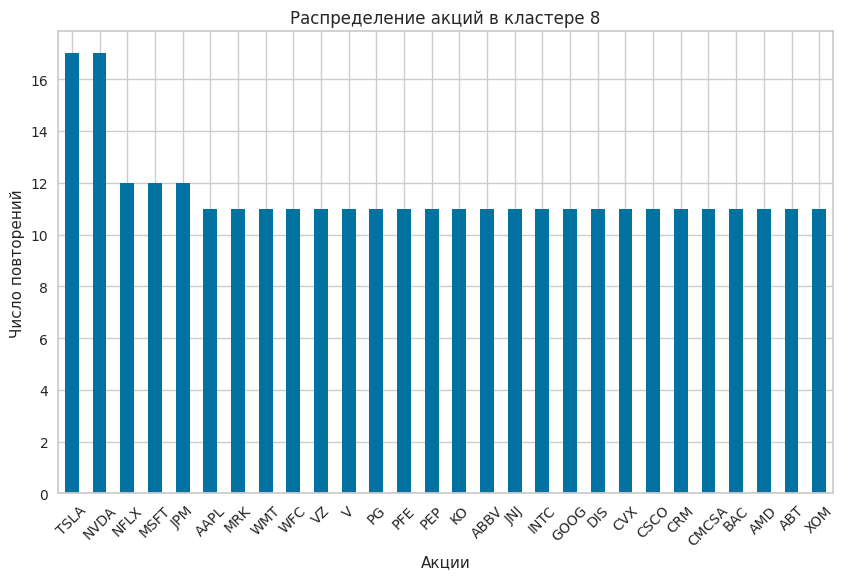

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

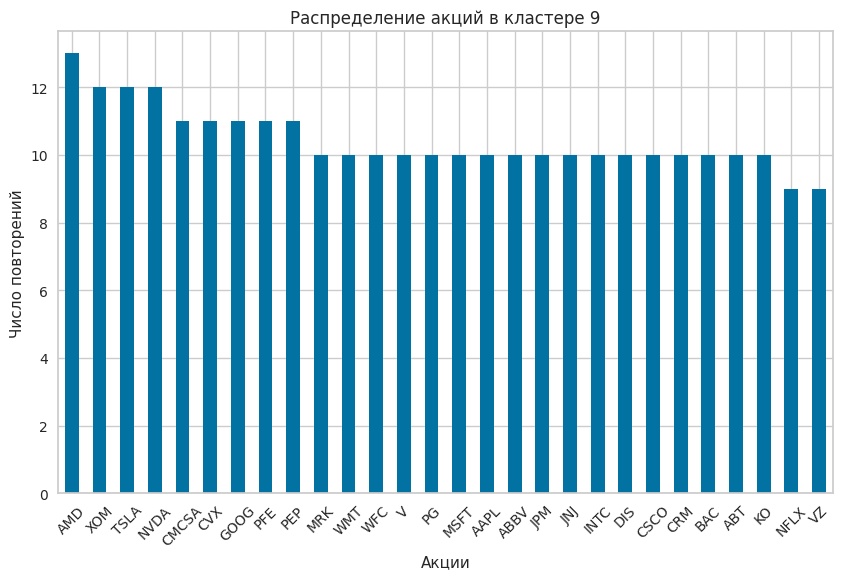

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

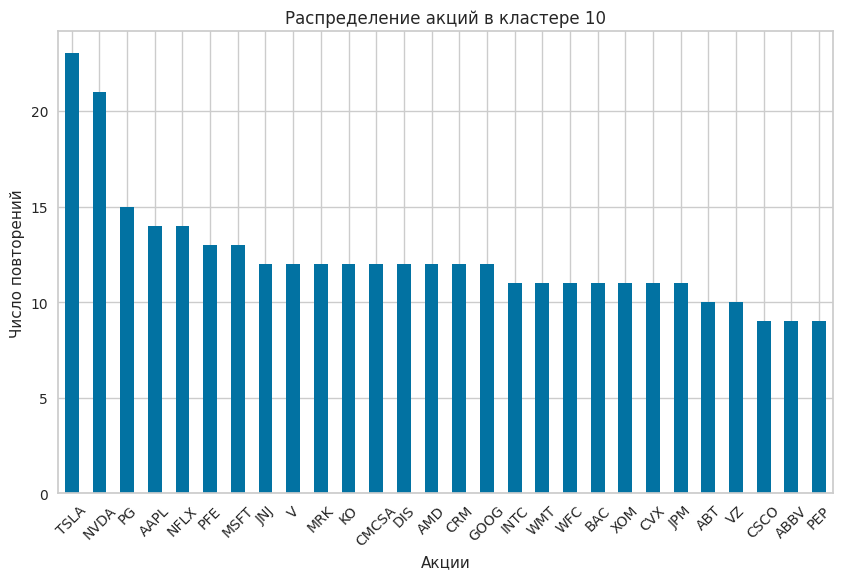

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

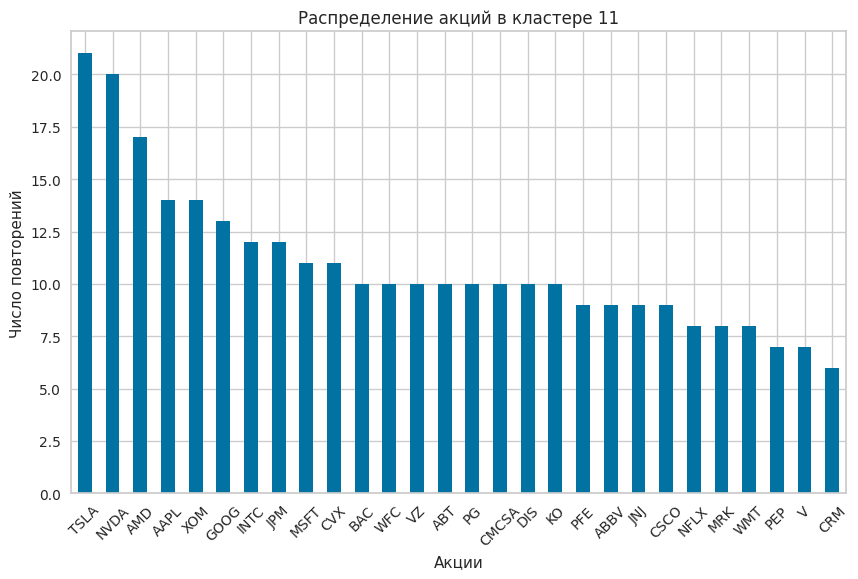

In [16]:
data = {}
n_mode = 100
for i in range(12):

    cluster_data = X_train[X_train["cluster"] == i]["Stock"]
    data[f'df_cluster{i}'] = X_train[X_train["cluster"] == i].copy()
    plt.figure(figsize=(10, 6))
    cluster_data.value_counts().head(n_mode).plot(kind='bar')
    plt.title(f'Распределение акций в кластере {i}')
    plt.xlabel('Акции')
    plt.ylabel('Число повторений')
    plt.xticks(rotation=45)
    plt.show()

In [17]:
df_grouped = X_train.groupby(['Stock', 'cluster'], as_index=False)['Close'].count()
train_pivot_table = df_grouped.pivot_table(index=['Stock'], columns=['cluster'], values=['Close'])
train_pivot_table.columns = [' '.join(str(col[1])) for col in train_pivot_table.columns.values]
train_pivot_table.reset_index(inplace=True)

In [18]:
for col in train_pivot_table.columns:
    if col == 'Stock':
        pass
    else:
        train_pivot_table.rename(columns={col : f'count_in_{col}cluster'}, inplace=True)

In [19]:
train_pivot_table.fillna(0, inplace=True)

In [20]:
train_pivot_table

,Stock,count_in_0cluster,count_in_1cluster,count_in_2cluster,count_in_3cluster,count_in_4cluster,count_in_5cluster,count_in_6cluster,count_in_7cluster,count_in_8cluster,count_in_9cluster,count_in_1 0cluster,count_in_1 1cluster
0,AAPL,11.0,11.0,13.0,12.0,11.0,14.0,0.0,11.0,11.0,10.0,14.0,14.0
1,ABBV,11.0,11.0,11.0,12.0,11.0,20.0,6.0,11.0,11.0,10.0,9.0,9.0
2,ABT,11.0,11.0,11.0,11.0,11.0,22.0,3.0,11.0,11.0,10.0,10.0,10.0
3,AMD,12.0,11.0,12.0,12.0,10.0,14.0,0.0,8.0,11.0,13.0,12.0,17.0
4,BAC,11.0,11.0,12.0,12.0,11.0,21.0,1.0,11.0,11.0,10.0,11.0,10.0
5,CMCSA,11.0,10.0,11.0,12.0,10.0,21.0,2.0,11.0,11.0,11.0,12.0,10.0
6,CRM,11.0,11.0,11.0,12.0,10.0,19.0,7.0,12.0,11.0,10.0,12.0,6.0
7,CSCO,11.0,11.0,11.0,12.0,10.0,21.0,5.0,12.0,11.0,10.0,9.0,9.0
8,CVX,11.0,11.0,11.0,12.0,11.0,21.0,1.0,10.0,11.0,11.0,11.0,11.0
9,DIS,11.0,11.0,11.0,12.0,11.0,22.0,0.0,11.0,11.0,10.0,12.0,10.0


In [21]:
def add_date_features(row):
    date_row = datetime.datetime.strptime(row['Datetime'], '%Y-%m-%d %H:%M:%S')
    day_name = calendar.day_name[date_row.weekday()]
    row['day_of_week'] = day_name
    
    weekday_number = date_row.weekday()
    if weekday_number % 2 != 0:
        row['even_day'] = 1
    else:
        row['even_day'] = 0
    day_number = date_row.day
    if day_number >=0 and day_number < 8:
        row['number_week'] = 1
    elif day_number >= 8 and day_number < 15:
         row['number_week'] = 2
    elif day_number >= 15 and day_number <= 21:
        row['number_week'] = 3
    elif day_number >= 22 and day_number <= 28:
        row['number_week'] = 4
    elif day_number >= 29 and day_number <= 31:
        row['number_week'] = 5
    
    return row


In [22]:
X_train = X_train.apply(add_date_features, axis=1)

In [23]:
X_train

,Datetime,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_124,emb_125,emb_126,emb_127,Stock,Close,cluster,day_of_week,even_day,number_week
0,2023-10-02 17:00:00,-0.385265,-0.123203,-0.091646,-0.204892,-0.034029,-0.085184,-0.201969,-0.228396,0.070437,...,-0.392990,-0.078081,-0.105887,-0.132299,AAPL,173.344000,7,Monday,0,1
1,2023-10-02 18:00:00,-0.351957,-0.255687,-0.294856,-0.080170,-0.416529,0.022934,-0.527076,-0.070292,-0.141278,...,0.018382,-0.261668,-0.132436,-0.192172,AAPL,173.639167,2,Monday,0,1
2,2023-10-02 19:00:00,-0.128883,-0.273875,-0.303679,-0.131447,-0.006280,-0.187134,-0.054544,-0.113141,0.089145,...,-0.251950,0.048974,-0.243150,-0.177219,AAPL,173.219500,0,Monday,0,1
3,2023-10-02 20:00:00,-0.415582,-0.120054,-0.236820,-0.267131,-0.413341,-0.032708,-0.496844,-0.358852,-0.127075,...,-0.137592,-0.229315,-0.074737,-0.112864,AAPL,173.224333,11,Monday,0,1
4,2023-10-02 21:00:00,-0.201604,-0.244662,-0.177347,-0.065351,-0.053743,-0.065106,-0.161435,-0.007014,0.081622,...,-0.247891,-0.111787,-0.310488,-0.250245,AAPL,173.018417,9,Monday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,2023-10-31 18:00:00,-0.416403,0.025767,-0.170889,-0.091016,-0.316288,0.058204,-0.502588,-0.148468,-0.190860,...,-0.084495,-0.463487,-0.058652,-0.113368,XOM,105.780667,1,Tuesday,1,5
3692,2023-10-31 19:00:00,0.183354,-0.277991,-0.376437,-0.046939,-0.041082,-0.277822,0.205418,0.120699,-0.132567,...,0.016781,-0.081754,-0.292394,-0.183382,XOM,105.537583,8,Tuesday,1,5
3693,2023-10-31 20:00:00,-0.430571,0.131885,-0.216386,-0.307566,-0.249061,-0.136346,-0.146051,-0.527754,-0.236913,...,-0.218495,-0.228080,0.082646,-0.027271,XOM,105.716186,5,Tuesday,1,5
3694,2023-10-31 21:00:00,-0.117654,-0.069224,-0.126597,-0.053445,-0.119163,-0.079515,-0.102096,0.054009,-0.116166,...,-0.175930,-0.327706,-0.232419,-0.167682,XOM,105.618500,3,Tuesday,1,5


In [24]:
new_data = {}
n_mode = 100
for i in range(12):
    cluster_data = X_train[X_train["cluster"] == i]
    new_data[f'cluster_{i}'] = cluster_data.copy()
    print(f'Кластер {i}')
    print(f"Cамые частые дни недели в кластере: {top_mode(cluster_data['day_of_week'], 7)}")
    print(f"Число четных дней в кластере: {cluster_data['even_day'].sum()}")
    print(f"Число не четных дней в кластере: {cluster_data['even_day'].count() - cluster_data['even_day'].sum()}")
    print(f"Cамый частые номера недели: {top_mode(cluster_data['number_week'], 5)}")


    #Закоментаренный код ниже выдает датафреймы с информацией в разрезе всех акций кластера

    #print(cluster_data.groupby('Stock').agg({'day_of_week' : compute_mode, 'even_day' : 'count', 'number_week' : 'count'}))

    

Кластер 0
Cамые частые дни недели в кластере: day_of_week
Monday       88
Tuesday      61
Friday       59
Wednesday    58
Thursday     54
Name: count, dtype: int64
Число четных дней в кластере: 115
Число не четных дней в кластере: 205
Cамый частые номера недели: number_week
2    148
1    143
3     29
Name: count, dtype: int64
Кластер 1
Cамые частые дни недели в кластере: day_of_week
Tuesday      79
Friday       57
Thursday     55
Wednesday    54
Monday       50
Name: count, dtype: int64
Число четных дней в кластере: 134
Число не четных дней в кластере: 161
Cамый частые номера недели: number_week
4    138
3    107
5     50
Name: count, dtype: int64
Кластер 2
Cамые частые дни недели в кластере: day_of_week
Monday       82
Tuesday      57
Thursday     57
Friday       57
Wednesday    55
Name: count, dtype: int64
Число четных дней в кластере: 114
Число не четных дней в кластере: 194
Cамый частые номера недели: number_week
2    146
1    135
3     27
Name: count, dtype: int64
Кластер 3
Cамые 